In [1]:
import sys
sys.path.append("../abraca-data/data")

In [2]:
import os
cwd = os.getcwd()
cwd

'/Users/sahahn/Desktop/DMC20_abraca-data-master-2'

In [3]:
# Load Data

In [5]:
import pandas as pd

df_train = pd.read_csv('data/orders0206_train.csv', sep='|', parse_dates=['time'])
df_test = pd.read_csv('data/orders0206_train.csv', sep='|', parse_dates=['time'])

df_info = pd.read_csv('data/infos.csv', sep='|', index_col='itemID')
product_prices = df_info['simulationPrice'].to_dict()
df_train["time"] = pd.to_datetime(df_train["time"], format='%Y-%m-%d %H:%M:%S')

df_items = pd.read_csv('data/items.csv', sep='|', index_col='itemID')


df_train_joined = df_train.join(df_info, on='itemID').join(df_items, on='itemID')

In [15]:
df_train_joined.head()

,time,transactID,itemID,order,salesPrice,simulationPrice,promotion,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,date
0,2018-01-01 00:01:56,2278968,450,1,17.42,17.42,NaN,0,7,0.00,1,2,1,27.00,2018-01-01
1,2018-01-01 00:01:56,2278968,83,1,5.19,5.19,NaN,0,4,0.00,1,1,1,12.89,2018-01-01
2,2018-01-01 00:07:11,2255797,7851,2,20.47,20.47,NaN,0,202,4.75,4,39,7,11.75,2018-01-01
3,2018-01-01 00:09:24,2278968,450,1,17.42,17.42,NaN,0,7,0.00,1,2,1,27.00,2018-01-01
4,2018-01-01 00:09:24,2278968,83,1,5.19,5.19,NaN,0,4,0.00,1,1,1,12.89,2018-01-01


In [43]:
#add up all orders that were made on one day
df_train_joined['sum_sold'] = df_train_joined['order'].groupby(df_train_joined['brand']).transform('sum')
df_brand = df_train_joined[["sum_sold", "brand", "date", "transactID", "itemID", "order", "salesPrice", "manufacturer", "category1", "category2", "category3",]]
df_brand.head()

,sum_sold,brand,date,transactID,itemID,order,salesPrice,manufacturer,category1,category2,category3
0,1158921,0,2018-01-01,2278968,450,1,17.42,7,1,2,1
1,1158921,0,2018-01-01,2278968,83,1,5.19,4,1,1,1
2,1158921,0,2018-01-01,2255797,7851,2,20.47,202,4,39,7
3,1158921,0,2018-01-01,2278968,450,1,17.42,7,1,2,1
4,1158921,0,2018-01-01,2278968,83,1,5.19,4,1,1,1


In [29]:
df_brand.brand.value_counts

<bound method IndexOpsMixin.value_counts of 0            0
1            0
2            0
3            0
4            0
          ... 
1727359    219
1727360    219
1727361    219
1727362      0
1727363     70
Name: brand, Length: 1727364, dtype: int64>

In [45]:
#limit data to relevant variables only -> sum_sold and date
branded = df_brand[["sum_sold", "brand"]]
#remove duplicates
df_branded_dr = branded.drop_duplicates(subset=['sum_sold','brand'])
df_branded = df_branded_dr.sort_values(by=["brand"])
df_branded.reset_index(level=0, inplace=True)
df_branded.head()


,index,sum_sold,brand
0,0,1158921,0
1,39237,1249,1
2,558,14584,2
3,7051,459,3
4,334591,18253,4


In [46]:
x = df_branded["brand"]
x

0        0
1        1
2        2
3        3
4        4
      ... 
238    261
239    262
240    263
241    264
242    265
Name: brand, Length: 243, dtype: int64

In [51]:
df_branded.loc[:,"sum_sold"].mean(), df_branded.loc[:,"sum_sold"].median()

(8813.514403292182, 641.0)

In [97]:
cut = df_branded['sum_sold'] >= 5300
df_branded[cut].count()

index       50
sum_sold    50
brand       50
dtype: int64

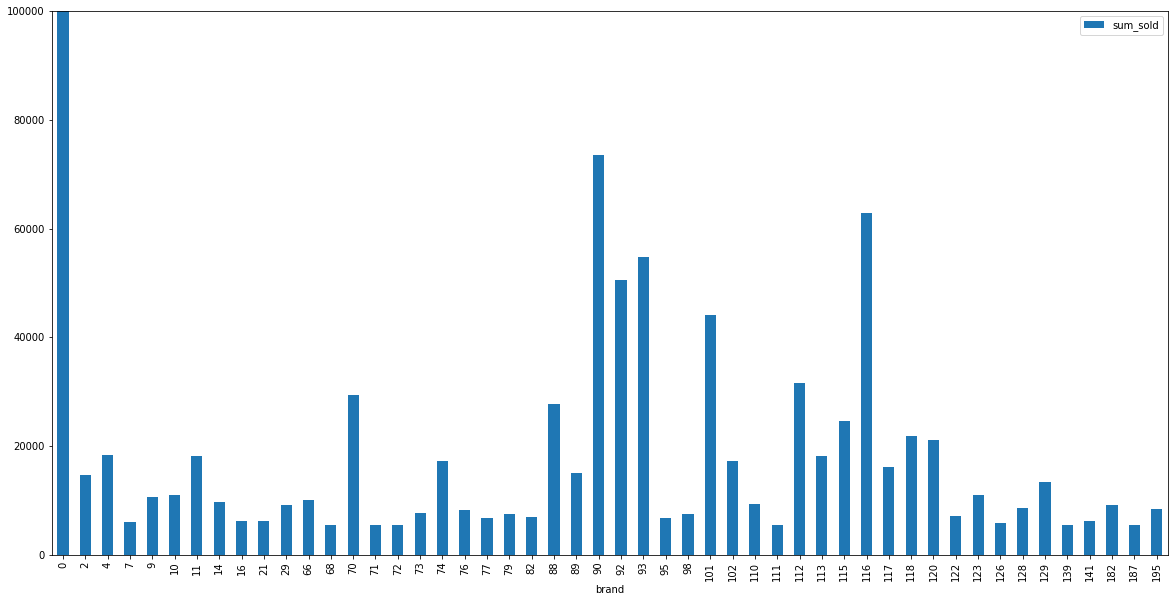

In [98]:
import matplotlib.pyplot as plt
df_branded[cut].plot.bar(x = 'brand', y = 'sum_sold', figsize=(20,10), ylim=(0, 100000))



#we definetly see a general upward trend